1.	Data Cleaning and Preprocessing
2.	Exploratory Data Analysis (EDA)
3.	Sales Trend Analysis
4.	Customer Segmentation
5.	Product Recommendations
6.	Predictive Modeling (for future sales)
Project Overview:
We’ll use a simulated online shopping dataset, perform data cleaning, analysis, and build a predictive model. The goal is to identify trends, segment customers, predict future sales, and provide product recommendations.


Step 1: Create Simulated Dataset
We'll create a dataset that mimics typical e-commerce data, with sales transactions including customer ID, product details, price, quantity, timestamps, and more.


In [9]:
import numpy as np
import pandas as pd
import random
from datetime import datetime, timedelta
import matplotlib as plt
# Simulating e-commerce transaction data

np.random.seed(42)

customers = np.random.randint(1000, 1100, 5000)
products = ['Laptop', 'Smartphone', 'Headphones', 'Tablet', 'Camera', 'Smartwatch', 'Monitor']
product_prices = {
    'Laptop': 1000,
    'Smartphone': 800,
    'Headphones': 150,
    'Tablet': 300,
    'Camera': 500,
    'Smartwatch': 200,
    'Monitor': 350
}
stock = {
    'Laptop' : 100,
    'Smartphone' : 150,
    'Headphones' : 50,
    'Tablet' : 200,
    'Camera' : 300,
    'Smartwatch' : 150,
    'Monitor' : 300
} 


product_choices = np.random.choice(products, 5000)
data = {
    'CustomerID': np.random.choice(customers, 5000),
    'Product': product_choices,

    'Quantity': np.random.randint(1, 3, 5000),
    
    'Price': [product_prices[prod] for prod in product_choices],

    'OrderDate': [datetime.now() - timedelta(days=random.randint(0, 180)) for _ in range(5000)],
    'Stock' : [stock[prod] for prod in product_choices],

}

# Creating DataFrame
df = pd.DataFrame(data)

#df['Price'] = product_prices[df['Product']]
df['TotalPrice'] = df['Quantity'] * df['Price']

df['Discount'] = df['TotalPrice'] - df['TotalPrice']*0.2
df['Instock'] = df['Stock'] - df['Quantity']
df['Reorder'] = df['Instock'] < (df['Stock'] * 0.3)
df.head()
#print(product_prices['Camera'])

,CustomerID,Product,Quantity,Price,OrderDate,Stock,TotalPrice,Discount,Instock,Reorder
0,1052,Laptop,1,1000,2024-09-16 19:14:36.970153,100,1000,800.0,99,False
1,1050,Camera,2,500,2024-12-14 19:14:36.970626,300,1000,800.0,298,False
2,1048,Camera,2,500,2024-11-21 19:14:36.970637,300,1000,800.0,298,False
3,1039,Laptop,2,1000,2025-01-13 19:14:36.970640,100,2000,1600.0,98,False
4,1014,Smartwatch,1,200,2024-12-16 19:14:36.970642,150,200,160.0,149,False


Step 2: Data Cleaning and Preprocessing
1.	Check for missing values, duplicate rows, and invalid data.
2.	Convert date column to a proper datetime type.
3.	Ensure numeric columns are appropriate.


In [10]:
# Check for missing values
print(df.isnull().sum())

# Remove duplicate rows
df.drop_duplicates(inplace=True)

# Ensure OrderDate is in datetime format
df['OrderDate'] = pd.to_datetime(df['OrderDate'])

# Removing any rows where price or quantity is invalid
df = df[df['Price'] > 0]
df = df[df['Quantity'] > 0]

# Inspect the first few rows after cleaning
df.head()


CustomerID    0
Product       0
Quantity      0
Price         0
OrderDate     0
Stock         0
TotalPrice    0
Discount      0
Instock       0
Reorder       0
dtype: int64


,CustomerID,Product,Quantity,Price,OrderDate,Stock,TotalPrice,Discount,Instock,Reorder
0,1052,Laptop,1,1000,2024-09-16 19:14:36.970153,100,1000,800.0,99,False
1,1050,Camera,2,500,2024-12-14 19:14:36.970626,300,1000,800.0,298,False
2,1048,Camera,2,500,2024-11-21 19:14:36.970637,300,1000,800.0,298,False
3,1039,Laptop,2,1000,2025-01-13 19:14:36.970640,100,2000,1600.0,98,False
4,1014,Smartwatch,1,200,2024-12-16 19:14:36.970642,150,200,160.0,149,False


Step 3: Exploratory Data Analysis (EDA)
3.1: Summary Statistics
Generate summary statistics for numerical columns.


In [11]:
# Summary statistics
print(df.describe())



        CustomerID     Quantity        Price                      OrderDate  \
count  5000.000000  5000.000000  5000.000000                           5000   
mean   1048.805600     1.502000   473.070000  2024-10-31 15:47:15.376498432   
min    1000.000000     1.000000   150.000000     2024-08-02 19:14:36.971116   
25%    1024.000000     1.000000   200.000000  2024-09-16 19:14:36.981746176   
50%    1048.000000     2.000000   350.000000  2024-10-31 19:14:36.971508992   
75%    1073.000000     2.000000   800.000000  2024-12-15 19:14:36.972585728   
max    1099.000000     2.000000  1000.000000     2025-01-29 19:14:36.983182   
std      28.838185     0.500046   292.190606                            NaN   

             Stock   TotalPrice     Discount      Instock  
count  5000.000000  5000.000000  5000.000000  5000.000000  
mean    180.710000   711.030000   568.824000   179.208000  
min      50.000000   150.000000   120.000000    48.000000  
25%     100.000000   300.000000   240.000000    

3.2: Total Revenue by Product
We'll calculate the total revenue per product.


Product
Laptop        1000
Smartphone     800
Camera         500
Monitor        350
Tablet         300
Smartwatch     200
Headphones     150
Name: Price, dtype: int64


<Axes: title={'center': 'Revenue by Product'}, xlabel='Product', ylabel='Revenue ($)'>

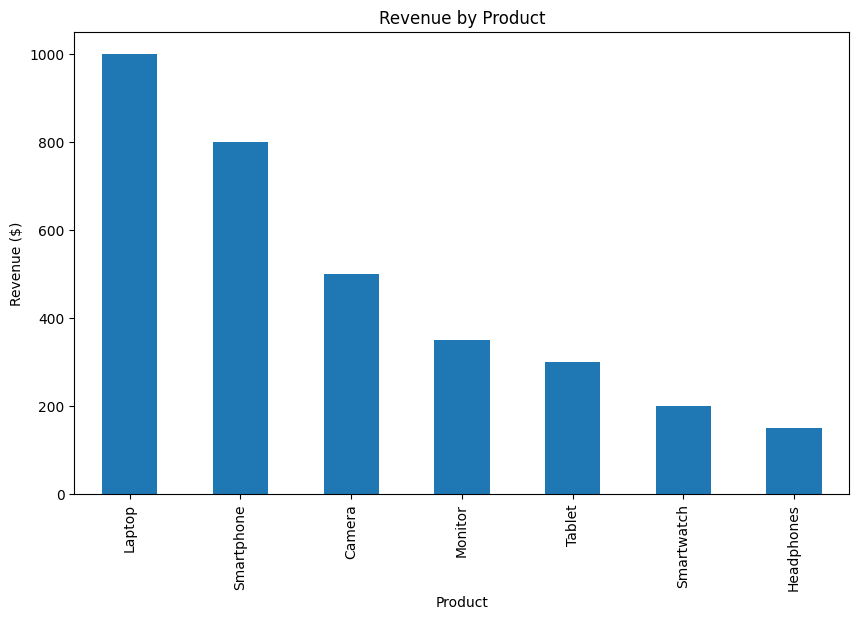

In [18]:
revenue_by_product = df.groupby('Product')['Price'].max().sort_values(ascending=False)
print(revenue_by_product)

# Visualize total revenue by product
revenue_by_product.plot(kind='bar', title="Revenue by Product", xlabel="Product", ylabel="Revenue ($)", figsize=(10, 6))
#plt.show()


3.3: Sales Over Time (Monthly)
Visualizing sales trends over the months.


<Axes: title={'center': 'Sales Over Time'}, xlabel='Month', ylabel='Total Sales ($)'>

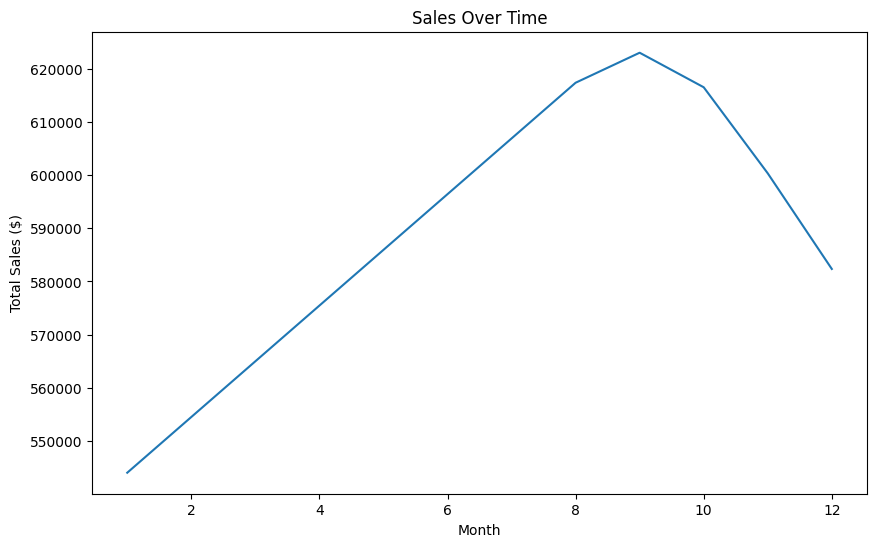

In [9]:
df['Month'] = df['OrderDate'].dt.month
monthly_sales = df.groupby('Month')['TotalPrice'].sum()

# Plot monthly sales
monthly_sales.plot(kind='line', title="Sales Over Time", xlabel="Month", ylabel="Total Sales ($)", figsize=(10, 6))
#plt.show()


3.4: Top Customers by Total Spending
Identify top-spending customers.


CustomerID
1030    15600
1079    17800
1070    20100
1017    20100
1093    21550
1039    21850
1027    22000
1090    22150
1075    22300
1042    23400
Name: TotalPrice, dtype: int64


<Axes: title={'center': 'Top 10 Customers by Spending'}, xlabel='Customer ID', ylabel='Total Spending ($)'>

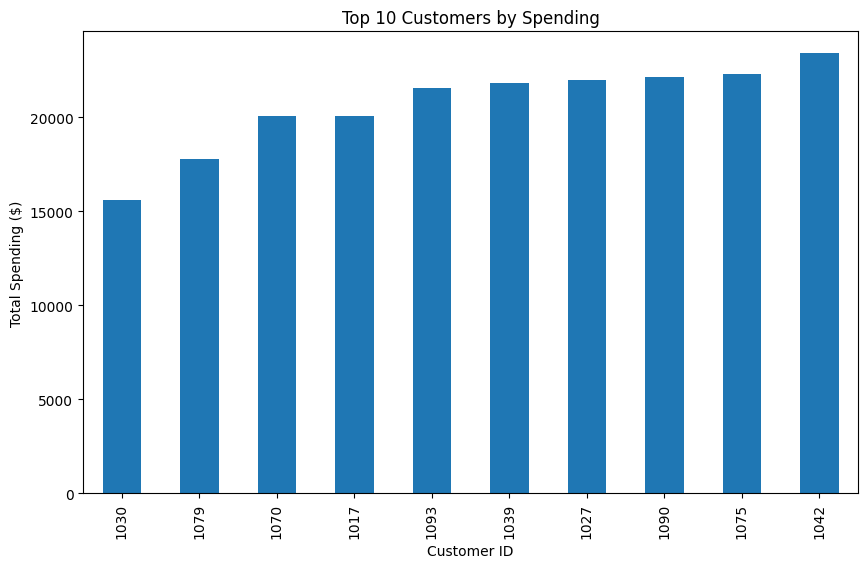

In [23]:
top_customers = df.groupby('CustomerID')['TotalPrice'].sum().sort_values(ascending=True).head(10)
print(top_customers)

# Visualize top customers by total spending
top_customers.plot(kind='bar', title="Top 10 Customers by Spending", xlabel="Customer ID", ylabel="Total Spending ($)", figsize=(10, 6))
#plt.show()


Step 4: Customer Segmentation (Clustering)
We'll perform customer segmentation to group customers based on their purchase behavior.
1.	Feature Engineering: Aggregate purchases for each customer.
2.	Clustering: Apply K-means clustering.


In [8]:
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler

# Aggregate data by CustomerID (Total purchases, average spending, etc.)
customer_summary = df.groupby('CustomerID').agg(
    total_spent=('TotalPrice', 'sum'),
    purchase_count=('TotalPrice', 'count'),
    avg_order_value=('TotalPrice', 'mean')
).reset_index()

# Feature scaling
scaler = StandardScaler()
customer_summary_scaled = scaler.fit_transform(customer_summary[['total_spent', 'purchase_count', 'avg_order_value']])

# Apply KMeans clustering
kmeans = KMeans(n_clusters=4, random_state=42)
customer_summary['Cluster'] = kmeans.fit_predict(customer_summary_scaled)

# Visualizing the clusters
import seaborn as sns

sns.scatterplot(data=customer_summary, x='total_spent', y='avg_order_value', hue='Cluster', palette='viridis')
plt.title("Customer Segments")
plt.xlabel("Total Spend ($)")
plt.ylabel("Average Order Value ($)")
plt.show()


ModuleNotFoundError: No module named 'sklearn'

Step 5: Predictive Modeling (Sales Forecasting)
We can build a simple time series model to predict future sales using ARIMA or Linear Regression.
1.	Feature Engineering: We need to create time-based features (e.g., month, year).
2.	Modeling: Use a time series model to predict future sales.


In [ ]:
import statsmodels.api as sm

# Prepare the data: aggregate sales by month
df['YearMonth'] = df['OrderDate'].dt.to_period('M')
monthly_sales = df.groupby('YearMonth')['TotalPrice'].sum()

# Convert monthly sales to a time series
monthly_sales = monthly_sales.asfreq('M')

# Apply ARIMA (AutoRegressive Integrated Moving Average)
model = sm.tsa.ARIMA(monthly_sales, order=(5,1,0))
model_fit = model.fit()

# Forecast future sales
forecast = model_fit.forecast(steps=6)

# Plot the forecast
plt.plot(monthly_sales.index, monthly_sales, label='Historical Sales')
plt.plot(pd.date_range(monthly_sales.index[-1], periods=7, freq='M')[1:], forecast, label='Forecast', color='red')
plt.title('Sales Forecast')
plt.xlabel('Date')
plt.ylabel('Total Sales ($)')
plt.legend()
plt.show()


Step 6: Product Recommendations
We can build a simple product recommendation system using a collaborative filtering approach (user-item interactions).
For simplicity, let’s use a content-based approach (recommend based on purchase history).


In [11]:
# Create a customer-product matrix
customer_product_matrix = pd.pivot_table(df, index='CustomerID', columns='Product', values='TotalPrice', aggfunc='sum', fill_value=0)

# Example: recommend products to a specific customer (CustomerID=1001)
customer_id = 1001
purchased_products = customer_product_matrix.loc[customer_id]

# Recommend products not purchased by the customer
recommended_products = purchased_products[purchased_products == 0].sort_values(ascending=False).head(5)
print("Recommended Products for Customer 1001:", recommended_products.index.tolist())


Recommended Products for Customer 1001: []


Step 7: Conclusion and Insights
At the end of this project, you would have:
•	Analyzing total sales by product.
•	Identifying sales trends over time (monthly or yearly).
•	Segmenting customers based on their purchase behaviors.
•	Forecasting future sales with time-series analysis.
•	Generating product recommendations based on customer behavior.
